In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("disney_plus_titles.csv",encoding="latin-1")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [62]:
data.dropna(inplace=True)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,24-Nov-21,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,19-Nov-21,2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...
12,s13,Movie,The Pixar Story,Leslie Iwerks,"Stacy Keach, John Lasseter, Brad Bird, John Mu...",United States,19-Nov-21,2007,G,91 min,"Documentary, Family",A groundbreaking company forever changes the f...
19,s20,Movie,Enchanted,Kevin Lima,"Amy Adams, Patrick Dempsey, James Marsden, Tim...",United States,12-Nov-21,2007,PG,110 min,"Comedy, Family, Fantasy",An animated princess winds up in the real worl...


In [4]:
Data=data["type"].value_counts()
Data

type
Movie      1052
TV Show     398
Name: count, dtype: int64

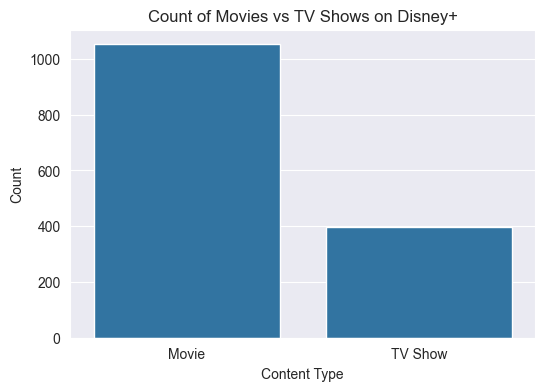

In [5]:
sns.set_style("darkgrid")
content_type_counts = data["type"].value_counts().head()
plt.figure(figsize=(6, 4))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values)
plt.title("Count of Movies vs TV Shows on Disney+")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

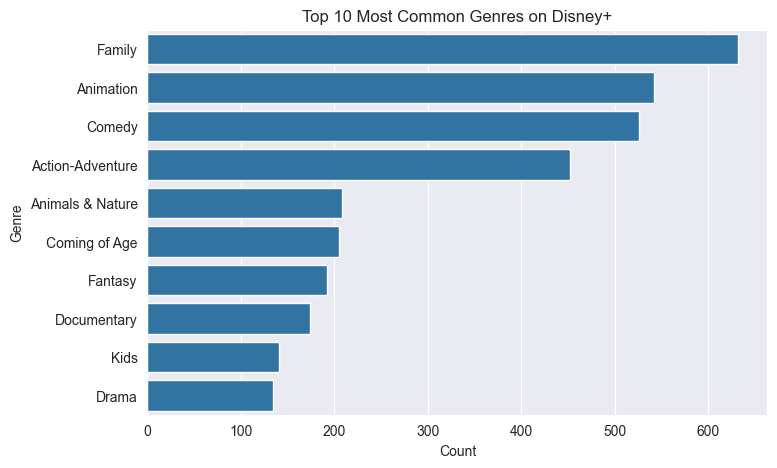

In [57]:
data["listed_in"] = data["listed_in"].astype(str)  # Ensure it's a string
all_genres = data["listed_in"].str.split(", ").explode()  # Split multiple genres
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 10 Most Common Genres on Disney+")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show();

In [49]:
all_genres = data["listed_in"].str.split(", ").explode(ignore_index=True)
all_genres

0              Animation
1                 Comedy
2                 Family
3           Biographical
4            Documentary
              ...       
2262              Comedy
2263       Coming of Age
2264    Action-Adventure
2265    Animals & Nature
2266           Animation
Name: listed_in, Length: 2267, dtype: object

C:\Users\USER\AppData\Local\Temp\ipykernel_20272\3651380708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rating_counts.index, x=rating_counts.values, palette="magma")


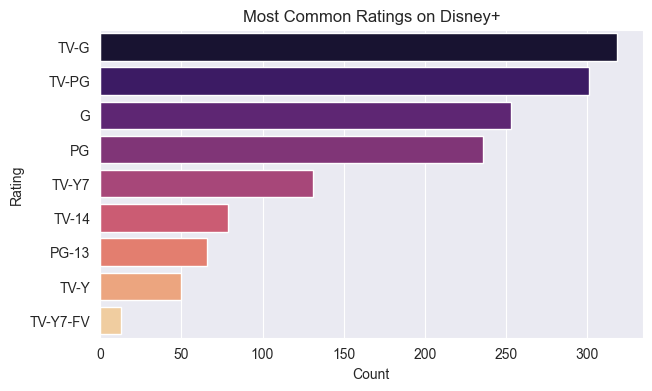

In [59]:
rating_counts = data["rating"].value_counts().head(10)

plt.figure(figsize=(7, 4))
sns.barplot(y=rating_counts.index, x=rating_counts.values, palette="magma")
plt.title("Most Common Ratings on Disney+")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

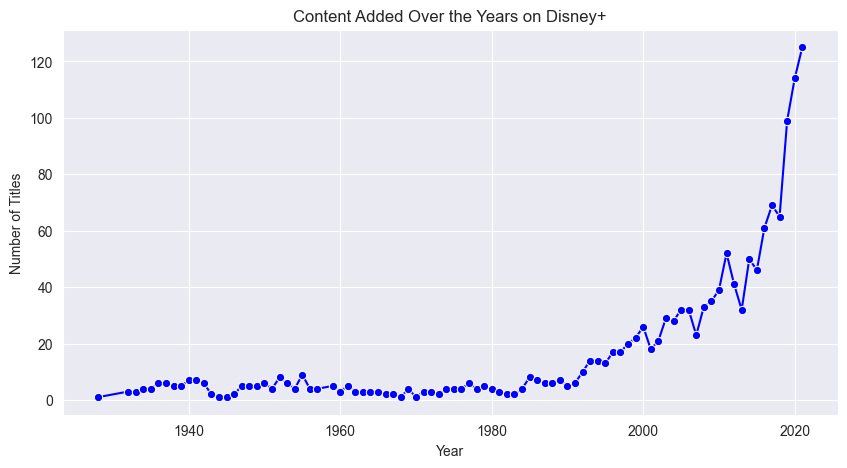

In [8]:
# data["release_year"] = pd.to_numeric(data["release_year"], errors="coerce") 
year_counts = data["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="blue")
plt.title("Content Added Over the Years on Disney+")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
